## ME40: Dimensional & Data Analyses in Engineering
### HW 5 - Monday November 12th, 2025
#### Marissa Till

### Problem 3 - Combined-cycle plant
##### (This was done in Python rather than MATLAB)

For this problem, we will use a dataset available online at
https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

This data is from a public repository and has been analyzed extensively in a paper used to create this exercise. You are welcome to read/study the paper, but it is long and complicated and need not be read to complete the exercise. The paper can be found at http://dx.doi.org/10.1016/j.ijepes.2014.02.027.

In a combined-cycle plant, one or more gas turbines extract electrical power from combustion. The hot exhaust gas is then used in a heat exchanger to produce steam, from which more energy is extracted in a steam turbine. A schematic of the plant from which the data has been gathered is shown below.

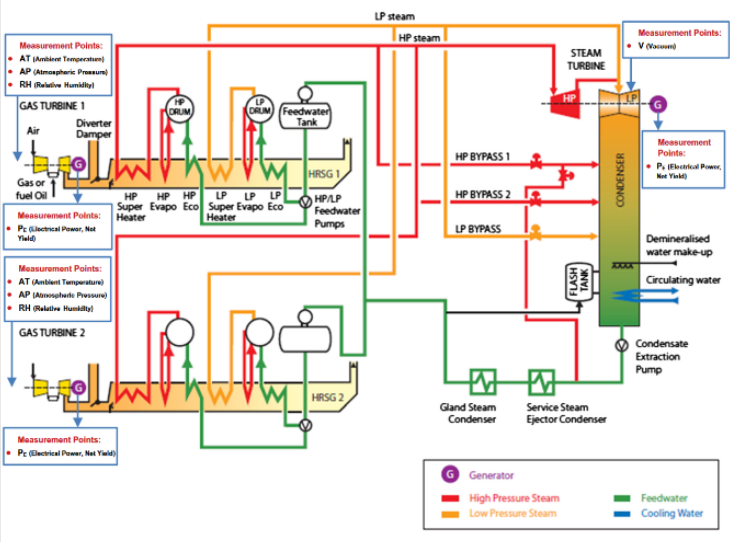

The data consists of 𝑁 = 9568 samples of 5 variables gathered over a multi-year period of operating the plant. The variables are:

• Ambient temperature (AT) in degrees Celsius.

• Ambient pressure (AP) in millibars.

• Relative humidity (RH).

• The exhaust steam output pressure (V) measured in cm of Hg.

• Full-load electrical power output (PE) in MW.

The ultimate goal is to derive a mathematical model to predict the power output (PE) in terms of some (or all) of the inputs.

1. Download the data from the website and load it in MATLAB.
2. Make scatter plots of each variable versus every other.

    Note: Use the subplot function in MATLAB to organize all the plots into one figure. The plots in the same column should have the same x axis; the plots on the same line the same y axis.

    Note: Do not consider obvious cases (e.g. AT vs AT) and only make plots one way (i.e. not AT vs AP and AP vs AT). Yes, that is 10 plots
3. Add a regression line for each of the plots. Use your best judgement to select between linear, polynomial, exponential… In the event you do not use a linear fit, provide a justification for it.

    Note: you may use the polyfit function.

    Note: for clarity, only add a legend if the fit is not linear.

In [1]:
# === Import Required Packages ===
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, least_squares  # Used for fitting data to a given model function and errors
from scipy.optimize._optimize import OptimizeWarning  # Specific warning raised by SciPy's optimization routines
warnings.filterwarnings("ignore", category=OptimizeWarning)  # Ignore any warnings of type OptimizeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)   # Ignore any warnings of type RuntimeWarning

In [2]:
# === 1. Download the data ===

filepath = '/Users/marissatill/Downloads/junior year/fall/me40/sets/week 7/CCPP/Folds5x2_pp.xlsx'

# Read the CSV file into a pandas DataFrame
df = pd.read_excel(filepath)

# Extract columns for the velocity components
at = df['AT'].values  # Ambient temperature (AT) in degrees Celsius
v  = df['V'].values   # The exhaust steam output pressure (V) measured in cm of Hg
ap = df['AP'].values  # Ambient pressure (AP) in millibars
rh = df['RH'].values  # Relative humidity (RH)
pe = df['PE'].values  # Full-load electrical power output (PE) in MW

print("Dataframe Shape:", df.shape)  # (Number of samples, number of components)

Dataframe Shape: (9568, 5)


AT vs V:
   The data clearly exhibits a curvature and is not linear.
   Power law fitting was attempted, but did not fit. A quadratic curve was fitted.

V vs PE:
   The data clearly exhibits a curvature and is not linear.
   Power law was fitted.




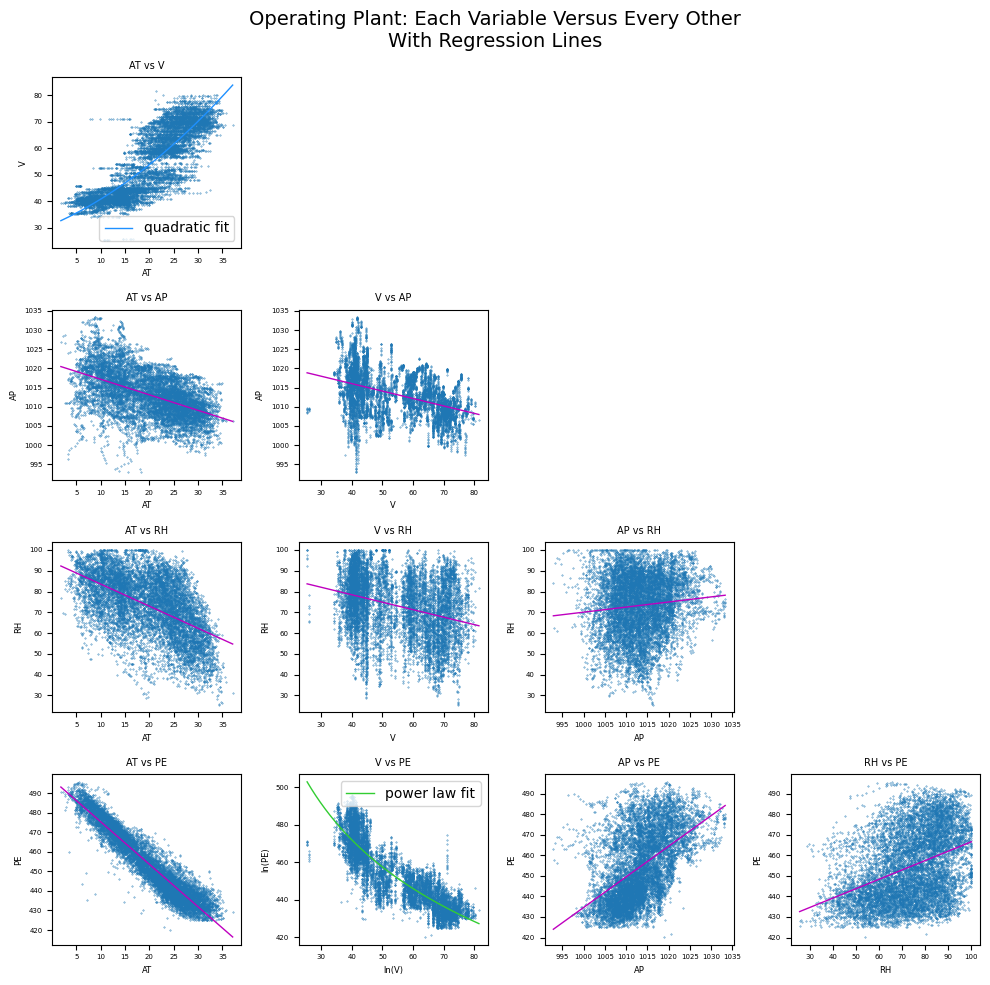

In [3]:
# === 2. Make scatter plots of each variable versus every other ===
# === 3. Add a regression line for each of the plots ===

# --- Helper for linear fit ---
def plot_linear_fit(ax, x, y, color='m'):
    p = np.polyfit(x, y, 1)  # Fit a 1st-degree polynomial (linear) to the data
    x_fit = np.linspace(np.min(x), np.max(x), 500)  # Create evenly spaced x-values across the data range
    y_fit = p[0] * x_fit + p[1]  # Compute the fitted y-values using the linear equation
    ax.plot(x_fit, y_fit, color, linewidth=1)  # Plot

# --- Helper for quadratic fit ---
def plot_quadratic_fit(ax, x, y, color='dodgerblue'):
    p = np.polyfit(x, y, 2)  # Fit a 2nd-degree polynomial (quadratic) to the data
    x_fit = np.linspace(np.min(x), np.max(x), 500)  # Create evenly spaced x-values across the data range
    y_fit = p[0]*x_fit**2 + p[1]*x_fit + p[2]  # Compute the fitted y-values using the quadratic equation
    ax.plot(x_fit, y_fit, color, linewidth=1, label="quadratic fit")  # Plot

# --- Helper for power-law fit (log-log) ---
def plot_powerlaw_fit(ax, x, y, color='limegreen'):
    p = np.polyfit(np.log(x), np.log(y), 1)  # Fit a straight line to the log-transformed data
    x_fit = np.linspace(np.min(x), np.max(x), 500)  # Create evenly spaced x-values across the data range
    y_fit = np.exp(p[1]) * x_fit ** p[0]  # Convert back from log-space to normal space
    ax.plot(x_fit, y_fit, color, linewidth=1, label="power law fit")


fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle('Operating Plant: Each Variable Versus Every Other\n'
             'With Regression Lines', fontsize=14)

# --- Row 0 (V) ---
axes[0, 0].scatter(at, v, s=0.1)
axes[0, 0].set_title('AT vs V', fontsize=7)
axes[0, 0].set_xlabel('AT', fontsize=6)
axes[0, 0].set_ylabel('V', fontsize=6)
# plot_powerlaw_fit(axes[0, 0], at, v)  # power law fit does not work
plot_quadratic_fit(axes[0, 0], at, v)  # quadratic fit
axes[0, 0].legend()
print("AT vs V:\n   The data clearly exhibits a curvature and is not linear.\n   "
      "Power law fitting was attempted, but did not fit. A quadratic curve was fitted.")

# --- Row 1  (AP) ---
axes[1, 0].scatter(at, ap, s=0.1)
axes[1, 0].set_title('AT vs AP', fontsize=7)
axes[1, 0].set_xlabel('AT', fontsize=6)
axes[1, 0].set_ylabel('AP', fontsize=6)
plot_linear_fit(axes[1, 0], at, ap)

axes[1, 1].scatter(v, ap, s=0.1)
axes[1, 1].set_title('V vs AP', fontsize=7)
axes[1, 1].set_xlabel('V', fontsize=6)
axes[1, 1].set_ylabel('AP', fontsize=6)
plot_linear_fit(axes[1, 1], v, ap)

# --- Row 2 (RH) ---
axes[2, 0].scatter(at, rh, s=0.1)
axes[2, 0].set_title('AT vs RH', fontsize=7)
axes[2, 0].set_xlabel('AT', fontsize=6)
axes[2, 0].set_ylabel('RH', fontsize=6)
plot_linear_fit(axes[2, 0], at, rh)

axes[2, 1].scatter(v, rh, s=0.1)
axes[2, 1].set_title('V vs RH', fontsize=7)
axes[2, 1].set_xlabel('V', fontsize=6)
axes[2, 1].set_ylabel('RH', fontsize=6)
plot_linear_fit(axes[2, 1], v, rh)

axes[2, 2].scatter(ap, rh, s=0.1)
axes[2, 2].set_title('AP vs RH', fontsize=7)
axes[2, 2].set_xlabel('AP', fontsize=6)
axes[2, 2].set_ylabel('RH', fontsize=6)
plot_linear_fit(axes[2, 2], ap, rh)

# --- Row 3 (PE) ---
axes[3, 0].scatter(at, pe, s=0.1)
axes[3, 0].set_title('AT vs PE', fontsize=7)
axes[3, 0].set_xlabel('AT', fontsize=6)
axes[3, 0].set_ylabel('PE', fontsize=6)
plot_linear_fit(axes[3, 0], at, pe)

axes[3, 1].scatter(v, pe, s=0.1)  # np.log is log base 10 = ln
axes[3, 1].set_title('V vs PE', fontsize=7)
axes[3, 1].set_xlabel('ln(V)', fontsize=6)
axes[3, 1].set_ylabel('ln(PE)', fontsize=6)
plot_powerlaw_fit(axes[3, 1], v, pe)  # power law fit
axes[3, 1].legend()
print("\nV vs PE:\n   The data clearly exhibits a curvature and is not linear.\n   "
      "Power law was fitted.\n\n")

axes[3, 2].scatter(ap, pe, s=0.1)
axes[3, 2].set_title('AP vs PE', fontsize=7)
axes[3, 2].set_xlabel('AP', fontsize=6)
axes[3, 2].set_ylabel('PE', fontsize=6)
plot_linear_fit(axes[3, 2], ap, pe)

axes[3, 3].scatter(rh, pe, s=0.1)
axes[3, 3].set_title('RH vs PE', fontsize=7)
axes[3, 3].set_xlabel('RH', fontsize=6)
axes[3, 3].set_ylabel('PE', fontsize=6)
plot_linear_fit(axes[3, 3], rh, pe)

# --- Remove unused subplots ---
fig.delaxes(axes[0, 1])
fig.delaxes(axes[0, 2])
fig.delaxes(axes[0, 3])
fig.delaxes(axes[1, 2])
fig.delaxes(axes[1, 3])
fig.delaxes(axes[2, 3])

# --- Make tick labels smaller ---
for row in axes:
    for ax in row:
        ax.tick_params(axis='both', labelsize=5)

plt.tight_layout()
plt.show()

Now, you are ready to formulate the mathematical model. The objective is to provide the most accurate formula to predict the power output (PE) without being overly complex. The model could involve any number of inputs (from one to four).

4. Propose your best mathematical model. We want to see:

    a. Why you selected the inputs you did (both the number of inputs and the specific variables)

    b. What dependence you selected for each input (linear, quadratic, power, exponential…)

    c. The final functional dependence

    d. The final Root Mean Square Error (RMSE)

Note: let’s see if you can come up with a better regression (i.e. more accurate and simpler) than your
fellow students. Yes, there will be a prize for the “best one”.

In [4]:
# === 4. Mathematical model to predict PE ===

# --- Correlation analysis ---
corr = df.corr()['PE']  # Pearson Correlation
print("Pearson Correlation Calculations:")
for var, val in corr.items():
    print(f" {var:<3} {val:.6f}")  # left-align the text (<3)
print("All variables show varying level of correlation with PE, so I will consider all of them.")

Pearson Correlation Calculations:
 AT  -0.948128
 V   -0.869780
 AP  0.518429
 RH  0.389794
 PE  1.000000
All variables show varying level of correlation with PE, so I will consider all of them.


In [5]:
# --- Define models ---
# Does not exceed quadratic (cubic, etc) because none of the relations plotted above show higher than quadratic.

def linear_model(x, a, b):
    return a * x + b

def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

def power_law(x, a, b):
    return a * np.power(x, b)

def exponential_model(x, a, b, c):
    return a * np.exp(b * x) + c

In [6]:
# --- Define Dependence Functions ---
def linear_function(X, coeffs):
    return np.dot(coeffs[0], X) + coeffs[1]

def quadratic_function(X, coeffs):
    return coeffs[0] * X**2 + coeffs[1] * X + coeffs[2]

def powerlaw_function(X, coeffs):
    return coeffs[0] * X**coeffs[1]

def exponential_function(X, coeffs):
    return coeffs[0] * np.exp(coeffs[1] * X) + coeffs[2]

In [7]:
# --- Define Variables ---

# Store input data
inputs = {'AT': at, 'V': v, 'AP': ap, 'RH': rh}
variables = list(inputs.keys())

# Map model names to functions
func_map = {
    'linear': linear_model,
    'quadratic': quadratic_model,
    'power-law': power_law,
    'exponential': exponential_model
}

# Store model types
model_types_list = ['linear', 'quadratic', 'power-law', 'exponential']

# Define y variable
y = pe

In [8]:
# --- Find the best individual model for each variable ---
best_model_for_var = {}
for var in variables:
    x = inputs[var]
    best_rmse = np.inf
    best_model = None
    best_coeffs = None

    for model_type in model_types_list:
        coeffs, _ = curve_fit(func_map[model_type], x, y, maxfev=10000)
        y_pred = func_map[model_type](x, *coeffs)
        rmse = np.sqrt(np.mean((y_pred - y)**2))
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model_type
            best_coeffs = coeffs

    best_model_for_var[var] = {'model': best_model, 'coeffs': best_coeffs}
    print(f"{var}: Best model = {best_model}, RMSE = {best_rmse:.4f}")

AT: Best model = quadratic, RMSE = 5.1994
V: Best model = quadratic, RMSE = 8.0973
AP: Best model = quadratic, RMSE = 14.5303
RH: Best model = quadratic, RMSE = 15.7149


In [9]:
# --- Predict PE ---

# Flatten parameters into a dictionary for least_squares
initial_params = {}
for var in variables:
    initial_params[var] = best_model_for_var[var]['coeffs']

# Convert dictionary to array function
def dict_to_array(param_dict):
    return np.concatenate(list(param_dict.values()))

# Convert array to dictionary function
def array_to_dict(array):
    param_dict = {}
    idx = 0
    for var in variables:
        n = len(initial_params[var])
        param_dict[var] = array[idx:idx+n]
        idx += n
    return param_dict

# Predict PE for all variables
def predict_PE(params_array):
    params_dict = array_to_dict(params_array)  # Convert the parameter array to a sensible dictionary
    pe_pred = np.zeros_like(y)  # Initialize the pe prediction shape with 0s

    # Add each variables contribution based on its input parameters/coefficients
    for var in variables:  # Loop through the 4 variables
        model = best_model_for_var[var]['model']  # Get the model for the current variable
        coeffs = params_dict[var]  # Get the current coefficients for the current variable
        pe_pred += func_map[model](inputs[var], *coeffs)  # Add current variable prediction to overall pe prediction
    return pe_pred

# Residuals function
def residuals(params_array):  # Takes in the parameters/coefficients as an array
    # Find the difference between the predicted pe and actual (y = pe)
    return predict_PE(params_array) - y

# Run simultaneous fit that solves a nonlinear least-squares problem
# Takes the initial parameters/coefficients in the form of an array
# Optimizes the coefficients to obtain the least error in the residuals function (between prediction and actual)
# Returns the solution found (optimal coefficients)
optimize_result = least_squares(residuals, dict_to_array(initial_params))

# Final predictions
coeffs_final = optimize_result.x                       # Obtain the x (coefficients solution) found
PE_pred_final = predict_PE(coeffs_final)               # Predict PE
rmse_final = np.sqrt(np.mean((PE_pred_final - y)**2))  # Find the final RMSE
print(f"Final RMSE: {rmse_final:.5f}")

Final RMSE: 4.28990


In [10]:
# --- Build the final formula ---

formula_terms = []
constants = []
coeffs_dict = array_to_dict(coeffs_final)  # Convert the final coefficients into a dictionary

for var in variables:
    coeffs = coeffs_dict[var]  # Get the coefficients for the current variable

    # Add quadratic terms (all variable fits were quadratic)
    formula_terms.append(f"{coeffs[0]:.4f}*{var}^2 + {coeffs[1]:.4f}*{var}")
    constants.append(coeffs[2])  # Gather constants in a separate list

sum_constants = sum(constants)  # Take the sum of all constants
formula_terms.append(f"{sum_constants:.4f}")  # Add the constant sum to the formula
formula = " + ".join(formula_terms)  # Turn list of terms into expression with '+'
print("\nFinal mathematical model:")
print("  PE =", formula)


Final mathematical model:
  PE = 0.0297*AT^2 + -2.9652*AT + 0.0011*V^2 + -0.4240*V + -0.0111*AP^2 + 22.6414*AP + -0.0008*RH^2 + -0.0074*RH + -11003.6378


### a.
For my regression, I selected all four inputs—AT (Ambient Temperature), V (Output Pressure), AP (Ambient Pressure), and RH (Relative Humidity) because all of these variables showed a measurable correlation with PE (Power Output) in the pearson correlation coefficient analysis. Including all inputs allows the model to capture each variables contribution to the final prediction.

### b.
I fit each input individually (against PE) to each candidate model (linear, quadratic, power-law, exponential). The model with the lowest RMSE for each input was selected. For each input, the quadratic fit had the lowest error. This shows that the relationships are not strictly linear, and are better represented with a squared term.

### c.
My final function dependence/formula to predict the power output (PE) without being overly complex is:

PE = 0.0297 AT$^2$ - 2.9652 AT + 0.0011 V$^2$ - 0.4240 V - 0.0111 AP$^2$ + 22.6414 AP - 0.0008 RH$^2$ - 0.0074 RH - 11003.6478

### d.
The final Root Mean Square Error (RMSE) for my regression is:

4.28990